# SWICTH: An Exemplar for Evaluating Self-Adaptive ML-Enabled Systems

Inter arrival rate file used for load simulation : wc_day53-r0-105m-l70.delta:
This dataset is derived from  [M. Arlitt and T. Jin, "1998 World Cup Web Site Access Logs", August 1998. Available at http://ita.ee.lbl.gov/html/contrib/WorldCup.html].  The 1998 World Cup Web Site Access Logs are made available under the following license:
 
Copyright (C) 1997, 1998, 1999 Hewlett-Packard Company. ALL RIGHTS RESERVED

This code snippet converts the logs for desired number of images mainating the interarrival rate graph.

SWICH users can use this and scale this logs for desired number of images in the resample function. Here this is illustrated for 535 images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.signal import resample

# Read in the inter-arrival times from the file
with open('wc_day53-r0-105m-l70.delta', 'r') as f:
    inter_arrivals = [float(line.strip()) for line in f]

# Calculate the arrival rates
arrival_rates = 1.0 / np.array(inter_arrivals)

# Calculate the scaling factor
max_rate = np.max(arrival_rates)
scaling_factor = max_rate / 30

# Scale down arrival rates
scaled_arrival_rates = arrival_rates / scaling_factor

# Calculate the scaled inter-arrival times
scaled_inter_arrivals = 1.0 / scaled_arrival_rates

# Time interval between measurements
time_interval = (1 / len(scaled_arrival_rates))

# Resample the arrival rates to have 535 points- images in this case
resampled_scaled_arrival_rates = resample(scaled_arrival_rates, 535)
print('Maximum scaled rate:', np.max(resampled_scaled_arrival_rates))

Maximum scaled rate: 24.963884687223356


In [2]:
# Calculate the resampled scaled inter-arrival times
resampled_scaled_inter_arrivals = 1.0 / resampled_scaled_arrival_rates

# Save the resampled scaled inter-arrival times to a CSV file
with open('inter_arrival_rate_quicktesting.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for inter_arrival_time in resampled_scaled_inter_arrivals:
        writer.writerow([inter_arrival_time])

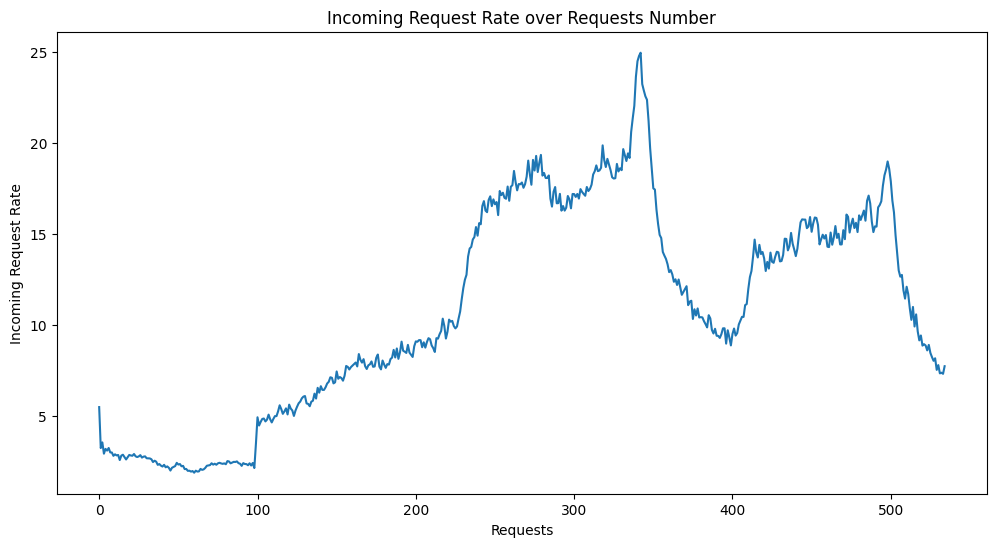

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Read in the inter-arrival times from the CSV file
file_path = 'inter_arrival_rate_quicktesting.csv'

try:
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        inter_arrivals = [float(row[0].strip()) for row in reader if float(row[0].strip()) != 0] # Exclude zero inter-arrival times
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()

# Convert inter-arrival times to arrival rates
arrival_rates = 1.0 / np.array(inter_arrivals)

# Plot arrival rates as a time series
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(len(arrival_rates)), arrival_rates)
ax.set_xlabel('Requests')
ax.set_ylabel('Incoming Request Rate')
ax.set_title('Incoming Request Rate over Requests Number')
plt.show()

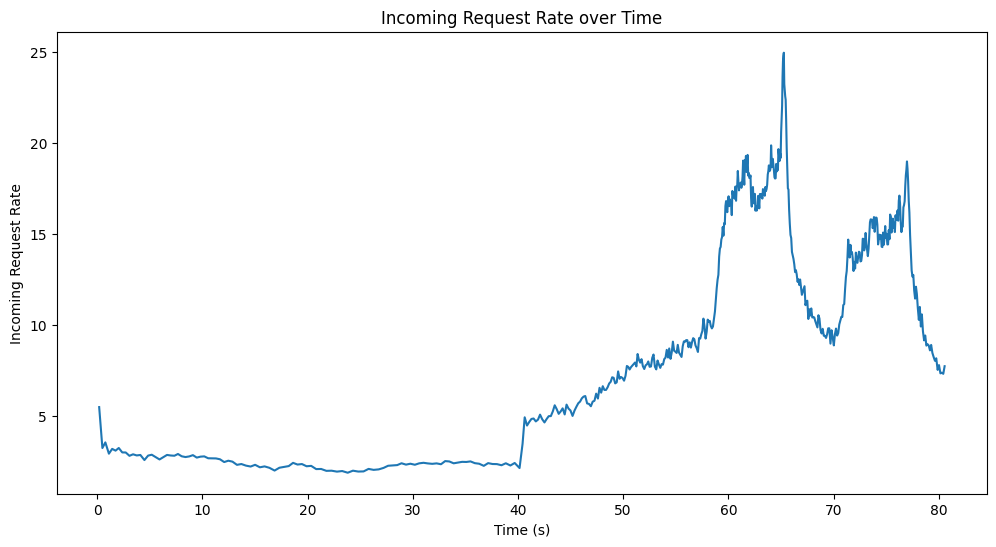

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Read in the inter-arrival times from the CSV file
file_path = 'inter_arrival_rate_quicktesting.csv'

try:
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        inter_arrivals = [float(row[0].strip()) for row in reader if float(row[0].strip()) != 0] # Exclude zero inter-arrival times
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()

# Convert inter-arrival times to arrival rates
arrival_rates = 1.0 / np.array(inter_arrivals)

# Calculate absolute arrival times
arrival_times = np.cumsum(inter_arrivals)

# Plot arrival rates against absolute arrival times
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(arrival_times, arrival_rates)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Incoming Request Rate')
ax.set_title('Incoming Request Rate over Time')
plt.show()